# E-Commerce Data Analysis: Brazillian E-Commerce Dataset by Olist
> Made as a completion to the Dicoding Indonesia Data Analysis course.  
**by E. Alifio Ditya**

## Introduction
In this course project, we will be tackling some business related questions using our newly acquired data analysis skills applied on the Olist E-Commerce Dataset. The dataset contains information about orders, customers, products, and reviews from 2016 to 2018. The dataset is divided into multiple CSV files, which we will be using to answer the following questions:

1. Which region produces the most revenue?
2. What is the average delivery time for each region?
3. In all recorded orders, is there any late delivery? If so, how many?
4. What may be the cause of late deliveries?

Dataset source: [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce)

## Import Libraries and Define Constants

In [68]:
import pandas as pd
import plotly.express as px
from IPython.display import display, Markdown
import seaborn as sns
import warnings

In [69]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [70]:
DATA_PATH = '../data/'

CUSTOMERS = DATA_PATH + 'customers_dataset.csv'
GEOLOCATION = DATA_PATH + 'geolocation_dataset.csv'
ORDER_ITEMS = DATA_PATH + 'order_items_dataset.csv'
PAYMENTS = DATA_PATH + 'order_payments_dataset.csv'
ORDERS = DATA_PATH + 'orders_dataset.csv'
REVIEWS = DATA_PATH + 'order_reviews_dataset.csv'
TRANSLATION = DATA_PATH + 'product_category_name_translation.csv'
PRODUCTS = DATA_PATH + 'products_dataset.csv'
SELLERS = DATA_PATH + 'sellers_dataset.csv'

## Data Wrangling
In this section, we will gather our data and prep them for analysis

### Data Gathering

In [71]:
orders = pd.read_csv(ORDERS)
customers = pd.read_csv(CUSTOMERS)
order_items = pd.read_csv(ORDER_ITEMS)
products = pd.read_csv(PRODUCTS)
sellers = pd.read_csv(SELLERS)
geolocation = pd.read_csv(GEOLOCATION)
payments = pd.read_csv(PAYMENTS)
reviews = pd.read_csv(REVIEWS)
translation = pd.read_csv(TRANSLATION)

df_dict = {
    'orders': orders,
    'customers': customers,
    'order_items': order_items,
    'products': products,
    'sellers': sellers,
    'geolocation': geolocation,
    'payments': payments,
    'reviews': reviews,
    'translation': translation,
}

In [72]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [73]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [74]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [75]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [76]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [77]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [78]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Assessing Data
Taking a peek at some of the characteristics of the data

In [80]:
for name, df in df_dict.items():
    print(name.upper() + " DATASET INFO")
    df.info()
    print()

ORDERS DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

CUSTOMERS DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0

## Data Cleaning
*"Raw data is seldom ready for analysis"*, as a wise man would say. We will be taking a look at two of the most common problems in data: Missing values and duplicates.

### Missing Values

In [81]:
def display_null_percentage(df_dict):
    """
    Generalized function to display null percentage for all datasets in df_dict.
    Each dataset should be a key-value pair, where the key is the dataset name and the value is the DataFrame.
    This will output the null percentages for each.
    """
    for name, df in df_dict.items():
        table_md = f"| Feature | Null Percentage |\n| --- | --- |\n"
        for feature in df.columns:
            null_pct = df[feature].isnull().mean() * 100
            table_md += f"| {feature} | {null_pct:.2f}% |\n"
        display(Markdown(f"<h3>Percentage of Null Values in {name} Dataset</h3>"))
        display(Markdown(table_md))

In [82]:
display_null_percentage(df_dict)

<h3>Percentage of Null Values in orders Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| order_id | 0.00% |
| customer_id | 0.00% |
| order_status | 0.00% |
| order_purchase_timestamp | 0.00% |
| order_approved_at | 0.16% |
| order_delivered_carrier_date | 1.79% |
| order_delivered_customer_date | 2.98% |
| order_estimated_delivery_date | 0.00% |


<h3>Percentage of Null Values in customers Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| customer_id | 0.00% |
| customer_unique_id | 0.00% |
| customer_zip_code_prefix | 0.00% |
| customer_city | 0.00% |
| customer_state | 0.00% |


<h3>Percentage of Null Values in order_items Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| order_id | 0.00% |
| order_item_id | 0.00% |
| product_id | 0.00% |
| seller_id | 0.00% |
| shipping_limit_date | 0.00% |
| price | 0.00% |
| freight_value | 0.00% |


<h3>Percentage of Null Values in products Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| product_id | 0.00% |
| product_category_name | 1.85% |
| product_name_lenght | 1.85% |
| product_description_lenght | 1.85% |
| product_photos_qty | 1.85% |
| product_weight_g | 0.01% |
| product_length_cm | 0.01% |
| product_height_cm | 0.01% |
| product_width_cm | 0.01% |


<h3>Percentage of Null Values in sellers Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| seller_id | 0.00% |
| seller_zip_code_prefix | 0.00% |
| seller_city | 0.00% |
| seller_state | 0.00% |


<h3>Percentage of Null Values in geolocation Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| geolocation_zip_code_prefix | 0.00% |
| geolocation_lat | 0.00% |
| geolocation_lng | 0.00% |
| geolocation_city | 0.00% |
| geolocation_state | 0.00% |


<h3>Percentage of Null Values in payments Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| order_id | 0.00% |
| payment_sequential | 0.00% |
| payment_type | 0.00% |
| payment_installments | 0.00% |
| payment_value | 0.00% |


<h3>Percentage of Null Values in reviews Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| review_id | 0.00% |
| order_id | 0.00% |
| review_score | 0.00% |
| review_comment_title | 88.34% |
| review_comment_message | 58.70% |
| review_creation_date | 0.00% |
| review_answer_timestamp | 0.00% |


<h3>Percentage of Null Values in translation Dataset</h3>

| Feature | Null Percentage |
| --- | --- |
| product_category_name | 0.00% |
| product_category_name_english | 0.00% |


It looks to be that only the Reviews dataset has a significant percentage of null values (88.34% on review_comment_title). For simplicity purposes, we will:

- Impute rows that contain nulls in the Order and Products dataset
- Drop columns that contain nulls in the Reviews dataset

In [83]:
def clean_null_values(df_dict):
    """
    Function to clean datasets by:
    - Filling null values in 'orders' and 'products' datasets with meaningful values rather than dropping rows.
    - Dropping columns that contain nulls in the 'reviews' dataset and printing which columns are deleted.

    Arguments:
    df_dict -- A dictionary of datasets where the key is the dataset name and the value is the DataFrame.
    """
    # Filling null values in the 'orders' dataset
    orders_df = df_dict.get('orders')
    if orders_df is not None:
        # For datetime columns: Fill based on order status
        orders_df['order_delivered_customer_date'] = orders_df.apply(
            lambda row: row['order_estimated_delivery_date'] if pd.isnull(row['order_delivered_customer_date']) 
            and row['order_status'] not in ['delivered', 'canceled'] else row['order_delivered_customer_date'], 
            axis=1
        )
        
        # For other columns, fill numeric values with median and categorical with "Unknown"
        orders_df.fillna({
            'order_approved_at': 'Unknown',  # Example placeholder
            'order_delivered_carrier_date': 'Unknown',
        }, inplace=True)
        
        df_dict['orders'] = orders_df

    # Separate numeric and categorical imputation for 'products' dataset
    products_df = df_dict.get('products')
    if products_df is not None:
        # Numeric columns: Fill missing values with the median
        numeric_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 
                           'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
        products_df[numeric_columns] = products_df[numeric_columns].apply(lambda col: col.fillna(col.median()))
        
        # Categorical columns: Fill missing values with 'Unknown'
        products_df['product_category_name'].fillna('Unknown', inplace=True)

        df_dict['products'] = products_df

    # Dropping columns with null values in the 'reviews' dataset
    reviews_df = df_dict.get('reviews')
    if reviews_df is not None:
        columns_with_nulls = reviews_df.columns[reviews_df.isnull().any()]
        reviews_cleaned = reviews_df.drop(columns=columns_with_nulls)
        print(f"Deleted columns {list(columns_with_nulls)} from 'reviews' dataset due to null values.")
        df_dict['reviews'] = reviews_cleaned


In [84]:
clean_null_values(df_dict)

Deleted columns ['review_comment_title', 'review_comment_message'] from 'reviews' dataset due to null values.


### Duplicates

In [85]:
def display_duplicate_counts(df_dict):
    """
    Function to display the count of duplicate rows in each dataset provided in df_dict.
    Each dataset should be a key-value pair, where the key is the dataset name and the value is the DataFrame.
    The function will output a Markdown table showing the number of duplicates for each dataset.
    """
    table_md = "| Dataset | Duplicate Rows |\n| --- | --- |\n"
    
    for name, df in df_dict.items():
        duplicate_count = df.duplicated().sum()
        table_md += f"| {name} | {duplicate_count} |\n"
    
    display(Markdown("<h3>Duplicate Rows in Each Dataset</h3>"))
    display(Markdown(table_md))

In [86]:
display_duplicate_counts(df_dict)

<h3>Duplicate Rows in Each Dataset</h3>

| Dataset | Duplicate Rows |
| --- | --- |
| orders | 0 |
| customers | 0 |
| order_items | 0 |
| products | 0 |
| sellers | 0 |
| geolocation | 261831 |
| payments | 0 |
| reviews | 0 |
| translation | 0 |


Only geolocation data has duplicates. These are redundant informations that are to be dropped.

In [87]:
def drop_duplicates(df_dict):
    """
    Function to drop duplicate rows from each dataset in the provided dictionary.
    For each dataset, the number of duplicate rows removed will be printed.

    Arguments:
    df_dict -- A dictionary of datasets where the key is the dataset name and the value is the DataFrame.
    """
    for name, df in df_dict.items():
        initial_count = len(df)
        df_cleaned = df.drop_duplicates()
        duplicates_removed = initial_count - len(df_cleaned)
        if duplicates_removed > 0:
            print(f"Removed {duplicates_removed} duplicate rows from '{name}' dataset.")
        df_dict[name] = df_cleaned

In [88]:
drop_duplicates(df_dict)

Removed 261831 duplicate rows from 'geolocation' dataset.


## Data Merging
We will be joining these datasets together to form one single dataset for analysis. We will be using inner joins on id columns for simplicity purposes.

In [89]:
def create_main_dataframe(df_dict):
    """
    Function to merge key datasets from df_dict into a single main dataframe.
    This function assumes that df_dict contains 'orders', 'customers', 'order_items', 'products', 'reviews', 'geolocation', 
    and a 'translation' dataframe to map 'product_category_name' to its English version.
    
    The merging steps ensure the 'customer_id', 'order_id', 'product_id', and 'geolocation_zip_code_prefix' keys are used appropriately.

    Arguments:
    df_dict -- A dictionary containing the datasets as DataFrames.

    Returns:
    main_df -- A merged DataFrame combining the relevant datasets, with 'product_category_name' translated to English.
    """

    required_keys = ['orders', 'customers', 'order_items', 'products', 'reviews', 'geolocation', 'translation']
    for key in required_keys:
        if key not in df_dict:
            raise ValueError(f"Dataset '{key}' is missing from df_dict")
    
    # Merge key datasets
    main_df = pd.merge(df_dict['orders'], df_dict['customers'], on='customer_id', how='inner')
    main_df = pd.merge(main_df, df_dict['order_items'], on='order_id', how='inner')
    main_df = pd.merge(main_df, df_dict['products'], on='product_id', how='inner')
    main_df = pd.merge(main_df, df_dict['reviews'], on='order_id', how='left')
    main_df = pd.merge(main_df, df_dict['geolocation'], 
                       left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
    
    # Merge with the translation dataframe to replace product_category_name with the English version
    main_df = pd.merge(main_df, df_dict['translation'], on='product_category_name', how='left')
    
    # Drop the old 'product_category_name' and rename 'product_category_name_english' to 'product_category_name'
    main_df.drop(columns=['product_category_name'], inplace=True)
    main_df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)
    
    return main_df


In [90]:
df = create_main_dataframe(df_dict)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_id,review_score,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.574809,-46.587471,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.578333,-46.587123,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.575033,-46.587451,sao paulo,SP,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.580054,-46.586673,sao paulo,SP,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.576281,-46.587276,sao paulo,SP,housewares


In [91]:
df.shape

(11826461, 35)

Now our data is prepped for analysis (All 11 million of them 😮)

In [92]:
# Lets see the features that we will be working with...
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'product_category_name'],
      dtype='object')

## Exploratory Data Analysis
After cleaning the data, we can look into our main dataset to gain some useful insights. We will be exploring some interesting points, answering our predefined questions, and visualizing them as charts.

### Insight 1: Distribution of Order Statuses

In [93]:
def plot_order_status_distribution(main_df):
    """
    Visualize the distribution of order statuses in the dataset, with the number of rows displayed on each bar.
    """
    status_counts = main_df['order_status'].value_counts().reset_index()
    status_counts.columns = ['Order Status', 'Count']

    fig = px.bar(status_counts, x='Order Status', y='Count', 
                 labels={'Order Status': 'Order Status', 'Count': 'Count'}, 
                 title='Order Status Distribution')
    
    # Add the count labels to each bar
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    
    fig.show()

In [94]:
plot_order_status_distribution(df)

##### Orders seem to be in check most of the time, with almost all being delivered. Some cases of orders not delivered seems to be unlikely or not recorded.

### Insight 2: Highest Selling Product Categories on Average

In [95]:
def plot_avg_price_by_category(main_df):
    """
    Visualize the top 5 highest selling average product categories, showing English category names.
    """

    # Calculate average price by English product category and select top 5
    avg_price_category = main_df.groupby('product_category_name')['price'].mean().sort_values(ascending=False).head(5)
    
    fig = px.bar(avg_price_category, x=avg_price_category.index, y=avg_price_category.values, 
                 labels={'x': 'Product Category (English)', 'y': 'Average Price'}, 
                 title='Top 5 Highest Average Product Prices by Category (English)')
    
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    
    # Show the chart
    fig.show()


In [96]:
plot_avg_price_by_category(df)

##### Computers and small home appliances among some of the highest pricing categories.

### Insight 3: Average Delivery Time Over Time

In [97]:
def plot_delivery_time_trend(main_df):
    """
    Visualize the trend of average delivery time over time (monthly).
    """
    # Convert to datetime and calculate delivery time in days
    main_df['order_purchase_timestamp'] = pd.to_datetime(main_df['order_purchase_timestamp'])
    main_df['order_delivered_customer_date'] = pd.to_datetime(main_df['order_delivered_customer_date'])
    
    # Filter valid rows and create a copy of the filtered DataFrame to avoid the warning
    valid_df = main_df.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp']).copy()
    
    # Calculate delivery time in days
    valid_df.loc[:, 'delivery_time_days'] = (valid_df['order_delivered_customer_date'] - valid_df['order_purchase_timestamp']).dt.days
    
    # Extract month-year from purchase date and convert to string
    valid_df.loc[:, 'purchase_month'] = valid_df['order_purchase_timestamp'].dt.to_period('M').astype(str)
    
    # Group by month-year and calculate average delivery time
    avg_delivery_time = valid_df.groupby('purchase_month')['delivery_time_days'].mean().reset_index()
    
    # Plot line chart
    fig = px.line(avg_delivery_time, x='purchase_month', y='delivery_time_days', 
                  labels={'purchase_month': 'Purchase Month', 'delivery_time_days': 'Average Delivery Time (Days)'}, 
                  title='Trend of Average Delivery Time Over Time')
    
    fig.show()

In [98]:
plot_delivery_time_trend(df)

##### Around late 2016, the service experienced a steep decrease in average delivery time. It has been generally stable ever since.

### Insight 4: Proportion of Revenue by Product Category

In [99]:
def plot_revenue_proportion_by_category(main_df):
    """
    Visualize the proportion of total revenue generated by each product category using a pie chart.
    Categories other than the top 5 will be grouped as 'Other'.
    """
    # Calculate revenue per order (price * quantity)
    main_df['revenue'] = main_df['price'] * main_df['order_item_id']
    
    # Group by product category and sum the revenue
    revenue_by_category = main_df.groupby('product_category_name')['revenue'].sum().reset_index()

    # Sort by revenue and get top 5 categories
    top_5_categories = revenue_by_category.nlargest(10, 'revenue')

    # Set all other categories as 'Other'
    revenue_by_category['product_category_name'] = revenue_by_category['product_category_name'].apply(
        lambda x: x if x in top_5_categories['product_category_name'].values else 'Other'
    )

    # Group the 'Other' categories and recompute the total revenue
    revenue_by_category = revenue_by_category.groupby('product_category_name')['revenue'].sum().reset_index()

    # Plot pie chart
    fig = px.pie(revenue_by_category, names='product_category_name', values='revenue', 
                 title='Proportion of Revenue by Product Category (Top 10 + Other)', 
                 labels={'product_category_name': 'Product Category', 'revenue': 'Total Revenue'})
    
    fig.show()

In [100]:
plot_revenue_proportion_by_category(df)

##### Bed bath table and health beauty categories are among the highest selling products in the service.

### Insight 5: Customer Demographic 

In [101]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_customer_demographic_scatter(main_df):
    """
    Visualize customer demographics as a scatter plot in Brazil using customer latitude and longitude.
    """
    # Create a Matplotlib figure and add a Cartopy GeoAxes (focused on Brazil)
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Set the extent to focus on Brazil (latitude and longitude bounds)
    ax.set_extent([-75, -35, -35, 6])  # [west, east, south, north] boundaries for Brazil
    
    # Add natural earth features (land, coastline, borders, and lakes)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.7)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    
    # Plot customer locations as a scatter plot
    plt.scatter(main_df['geolocation_lng'], main_df['geolocation_lat'], color='red', alpha=0.9, s=10, label='Customers')
    
    # Add title and labels
    plt.title('Customer Demographic Scatter Plot in Brazil')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Show plot
    plt.legend()
    plt.show()

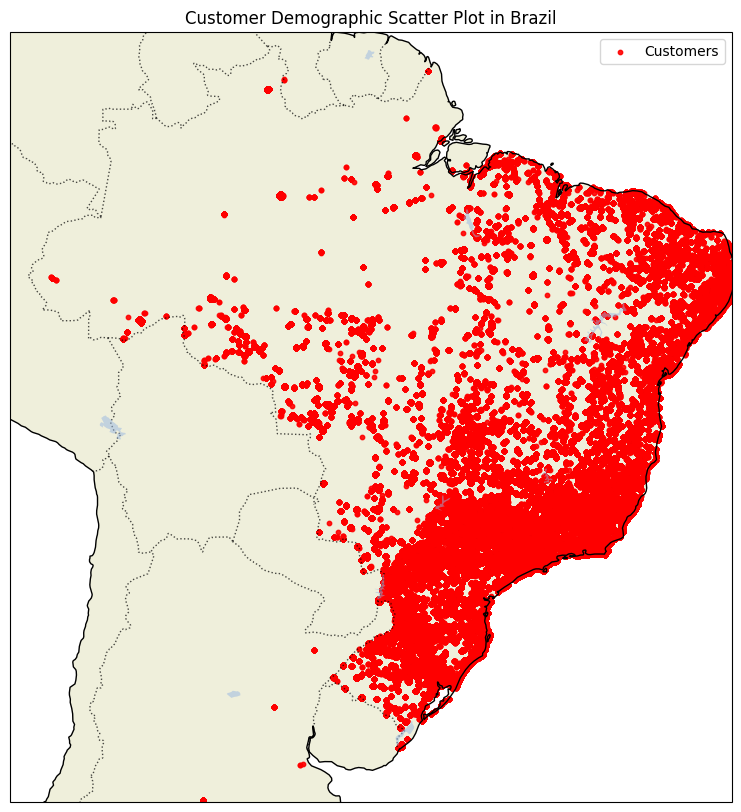

In [102]:
plot_customer_demographic_scatter(df)

##### Most customers are from the eastern part of Brazil.

## Answering Business Questions
We already defined these business questions before:

1. Which region produces the most revenue?
2. What is the average delivery time for each region?
3. In all recorded orders, is there any late delivery? If so, how many?
4. What may be the cause of late deliveries?

Lets dive into them.

### 1. Which region produces the most revenue?

In [118]:
def plot_revenue_by_region(main_df):
    """
    Find and visualize which region produces the most revenue.
    """
    # Calculate total revenue per region (customer_state)
    main_df['revenue'] = main_df['price'] * main_df['order_item_id']
    revenue_by_region = main_df.groupby('customer_state')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)
    
    # Plot the revenue by region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='customer_state', y='revenue', data=revenue_by_region, palette='viridis')
    plt.title('Revenue by Region (Customer State)')
    plt.xlabel('Customer State')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

    # Display the answer
    top_region = revenue_by_region.iloc[0]
    display(Markdown(f"<h3>The region that produces the most revenue is {top_region['customer_state']} with a total revenue of {top_region['revenue']:.2f}.</h3>"))


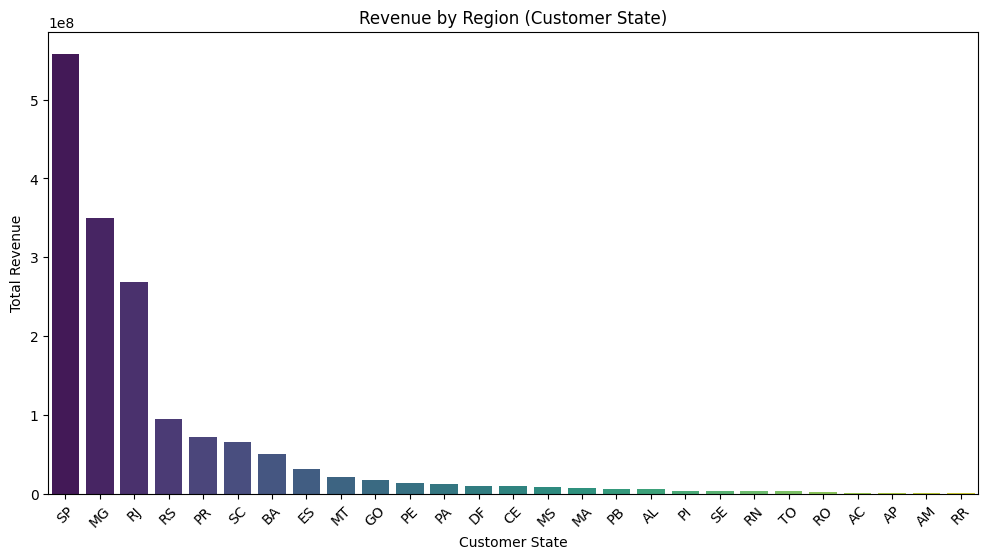

<h3>The region that produces the most revenue is SP with a total revenue of 558144291.77.</h3>

In [119]:
plot_revenue_by_region(df)

### 2. What is the average delivery time for each region?

In [116]:
def plot_avg_delivery_time_by_region(main_df):
    """
    Find and visualize the average delivery time for each region.
    """
    # Calculate delivery time in days
    main_df['order_delivered_customer_date'] = pd.to_datetime(main_df['order_delivered_customer_date'])
    main_df['order_purchase_timestamp'] = pd.to_datetime(main_df['order_purchase_timestamp'])
    main_df['delivery_time_days'] = (main_df['order_delivered_customer_date'] - main_df['order_purchase_timestamp']).dt.days

    # Group by customer state and calculate average delivery time
    avg_delivery_time_by_region = main_df.groupby('customer_state')['delivery_time_days'].mean().reset_index().sort_values(by='delivery_time_days', ascending=False)
    
    # Plot the average delivery time by region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='customer_state', y='delivery_time_days', data=avg_delivery_time_by_region, palette='coolwarm')
    plt.title('Average Delivery Time by Region (Customer State)')
    plt.xlabel('Customer State')
    plt.ylabel('Average Delivery Time (Days)')
    plt.xticks(rotation=45)
    plt.show()

    # Display the answer
    display(Markdown("<h3>The average delivery time for each region has been plotted.</h3>"))

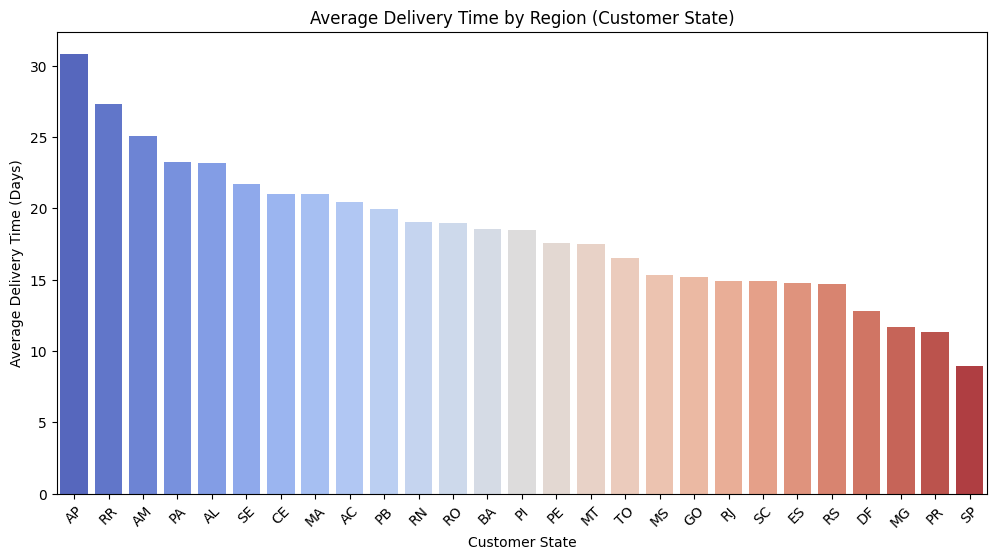

<h3>The average delivery time for each region has been plotted.</h3>

In [117]:
plot_avg_delivery_time_by_region(df)

### 3. In all recorded orders, is there any late delivery? If so, how many?

In [114]:
def count_late_deliveries(main_df):
    """
    Find if there are any late deliveries and how many.
    """
    # Convert relevant columns to datetime
    main_df['order_estimated_delivery_date'] = pd.to_datetime(main_df['order_estimated_delivery_date'])
    main_df['late_delivery'] = main_df['order_delivered_customer_date'] > main_df['order_estimated_delivery_date']

    # Count late deliveries
    late_deliveries_count = main_df['late_delivery'].sum()
    
    # Display the answer
    if late_deliveries_count > 0:
        display(Markdown(f"<h3>There are {late_deliveries_count} late deliveries recorded.</h3>"))
    else:
        display(Markdown("<h3>There are no late deliveries recorded.</h3>"))

In [115]:
count_late_deliveries(df)

<h3>There are 862069 late deliveries recorded.</h3>

### 4. What may be the cause of late deliveries?

In [120]:
def analyze_causes_of_late_deliveries_correlation(main_df):
    """
    Analyze potential causes of late deliveries by calculating correlations with a new binary column 'is_late'.
    """
    # Create a new binary column 'is_late'
    main_df['is_late'] = (main_df['order_delivered_customer_date'] > main_df['order_estimated_delivery_date']).astype(int)
    
    # Select numerical columns to analyze correlations
    numerical_columns = ['freight_value', 'price', 'product_weight_g', 'product_length_cm', 
                         'product_height_cm', 'product_width_cm', 'order_item_id']
    
    # Calculate correlation matrix with 'is_late'
    correlations = main_df[numerical_columns + ['is_late']].corr()['is_late'].drop('is_late').sort_values(ascending=False)
    
    # Plot the correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
    plt.title('Correlation with Late Deliveries (is_late)')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.show()

    # Display the findings
    display(Markdown("**The correlations between 'is_late' and other features have been plotted. Features with higher positive correlation values may contribute more to late deliveries.**"))
    display(Markdown(correlations.to_markdown()))

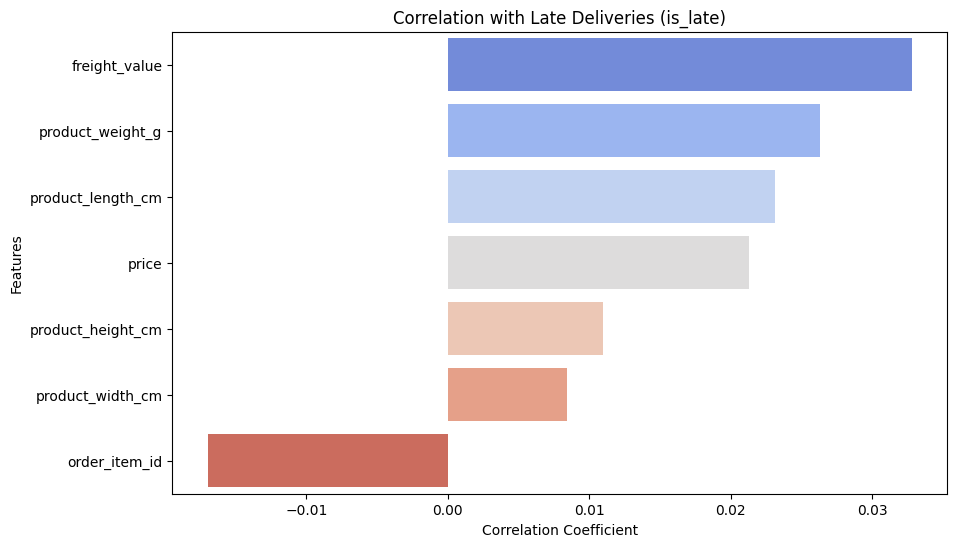

**The correlations between 'is_late' and other features have been plotted. Features with higher positive correlation values may contribute more to late deliveries.**

|                   |     is_late |
|:------------------|------------:|
| freight_value     |  0.0327956  |
| product_weight_g  |  0.0262712  |
| product_length_cm |  0.023113   |
| price             |  0.0212993  |
| product_height_cm |  0.0109686  |
| product_width_cm  |  0.00841235 |
| order_item_id     | -0.0169737  |

In [122]:
analyze_causes_of_late_deliveries_correlation(df)

> ### Freight Value, Product Weight, and Product Length are Positively Correlated with Late Deliveries

- Expensive shipments may involve additional handling, which could lead to delays, particularly if logistics companies face challenges with larger or heavier shipments. Hence, higher freight value could contribute to late deliveries.


- Heavy products may require specialized equipment, increase logistical complexity, and slow down the delivery process. This increases the likelihood of late deliveries.


- Large dimensions can cause delays in logistics as the items require more space and care. Lengthy items may also take longer to load/unload, contributing to potential delays in delivery times.


- The order item ID represents the count of items in an order (i.e., the number of units within an order). A higher order item count could indicate bulk or frequent purchases. Higher order counts often come from customers who make regular or bulk purchases and are familiar with the shipping process. Logistics companies may prioritize frequent or bulk buyers and streamline their processes, leading to faster, more efficient deliveries. Thus, a higher number of items in an order could reduce the chances of late deliveries.

## RFM (Recency, Frequency, Monetary) Analysis
RFM analysis is a technique used in customer segmentation based on three key factors:

- Recency (R): How recently a customer made a purchase.
- Frequency (F): How often a customer makes a purchase.
- Monetary (M): How much money a customer spends.

In [105]:
def rfm_analysis(main_df):
    """
    Perform RFM analysis using the order dataset.
    
    RFM:
    - Recency: Days since last purchase
    - Frequency: Total number of purchases
    - Monetary: Total monetary value of purchases
    """
    # Convert relevant columns to datetime
    main_df['order_purchase_timestamp'] = pd.to_datetime(main_df['order_purchase_timestamp'])
    
    # Set reference date as the most recent order in the dataset
    reference_date = main_df['order_purchase_timestamp'].max()
    
    # Calculate Recency: Days since the customer's last order
    rfm_table = main_df.groupby('customer_unique_id').agg({
        'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
        'order_id': 'count',  # Frequency
        'price': 'sum'  # Monetary (sum of all prices)
    }).reset_index()
    
    # Rename columns to RFM
    rfm_table.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']
    
    # Normalize the monetary value by summing `price * order_item_id` (if necessary for quantity adjustments)
    rfm_table['monetary'] = rfm_table['monetary'] * main_df.groupby('customer_unique_id')['order_item_id'].sum().values
    
    # Rank customers into quintiles for Recency, Frequency, and Monetary
    rfm_table['R_rank'] = pd.qcut(rfm_table['recency'], 5, labels=range(5, 0, -1))  # Recency ranking (1-5)
    rfm_table['F_rank'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=range(1, 6))  # Frequency ranking (1-5)
    rfm_table['M_rank'] = pd.qcut(rfm_table['monetary'], 5, labels=range(1, 6))  # Monetary ranking (1-5)
    
    # Combine RFM ranks to create an RFM Score
    rfm_table['RFM_score'] = rfm_table[['R_rank', 'F_rank', 'M_rank']].sum(axis=1)
    
    # Display the RFM table
    return rfm_table[['customer_unique_id', 'recency', 'frequency', 'monetary', 'RFM_score']]


In [106]:
rfm_table = rfm_analysis(df)
rfm_table

,customer_unique_id,recency,frequency,monetary,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,51,337869.90,9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,60,68040.00,7
2,0000f46a3911fa3c0805444483337064,541,78,419796.00,7
3,0000f6ccb0745a6a4b88665a16c9f078,325,28,20376.16,4
4,0004aac84e0df4da2b147fca70cf8255,292,102,1872720.00,10
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,16,301440.00,5
95416,fffea47cd6d3cc0a88bd621562a9d061,266,55,196292.25,7
95417,ffff371b4d645b6ecea244b27531430a,572,52,243089.60,5
95418,ffff5962728ec6157033ef9805bacc48,123,35,140875.00,8


In [107]:
def categorize_rfm(rfm_table):
    """
    Categorize RFM metrics into meaningful labels.
    
    Arguments:
    rfm_table -- DataFrame containing RFM analysis results
    
    Returns:
    rfm_table -- DataFrame with categorical labels for RFM metrics
    """
    
    # Categorize Monetary into bins
    rfm_table['Monetary_Category'] = pd.cut(rfm_table['monetary'],
                                            bins=[-1, 100, 500, 1000, float('inf')],
                                            labels=['Low Spender', 'Medium Spender', 'High Spender', 'Very High Spender'])

    # Categorize Frequency into bins
    rfm_table['Frequency_Category'] = pd.cut(rfm_table['frequency'],
                                             bins=[-1, 1, 3, 5, float('inf')],
                                             labels=['Rare', 'Occasional', 'Frequent', 'Very Frequent'])
    
    # Categorize Recency into bins
    rfm_table['Recency_Category'] = pd.cut(rfm_table['recency'],
                                           bins=[-1, 30, 60, 120, float('inf')],
                                           labels=['Recent', 'Moderately Recent', 'Stale', 'Very Stale'])
    
    return rfm_table


def add_count_and_percentage(ax, data, column_name):
    """
    Add count and percentage annotations to the bars in the bar plot.
    
    Arguments:
    ax -- The axis to add annotations to
    data -- DataFrame containing the data
    column_name -- The column for which to calculate percentages
    """
    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{count}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


def plot_rfm_analysis(rfm_table):
    """
    Visualize RFM analysis with various plots, using categorized RFM metrics.
    
    Arguments:
    rfm_table -- DataFrame containing RFM analysis results
    """
    # Apply the categorization of RFM metrics
    rfm_table = categorize_rfm(rfm_table)
    
    # Plot the distribution of Recency categories
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='Recency_Category', data=rfm_table, order=['Recent', 'Moderately Recent', 'Stale', 'Very Stale'])
    plt.title('Recency Category Distribution')
    plt.xlabel('Recency Category')
    plt.ylabel('Count')
    add_count_and_percentage(ax, rfm_table, 'Recency_Category')
    plt.show()
    
    # Plot the distribution of Frequency categories
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='Frequency_Category', data=rfm_table, order=['Rare', 'Occasional', 'Frequent', 'Very Frequent'])
    plt.title('Frequency Category Distribution')
    plt.xlabel('Frequency Category')
    plt.ylabel('Count')
    add_count_and_percentage(ax, rfm_table, 'Frequency_Category')
    plt.show()

    # Plot the distribution of Monetary categories
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='Monetary_Category', data=rfm_table, order=['Low Spender', 'Medium Spender', 'High Spender', 'Very High Spender'])
    plt.title('Monetary Category Distribution')
    plt.xlabel('Monetary Category')
    plt.ylabel('Count')
    add_count_and_percentage(ax, rfm_table, 'Monetary_Category')
    plt.show()

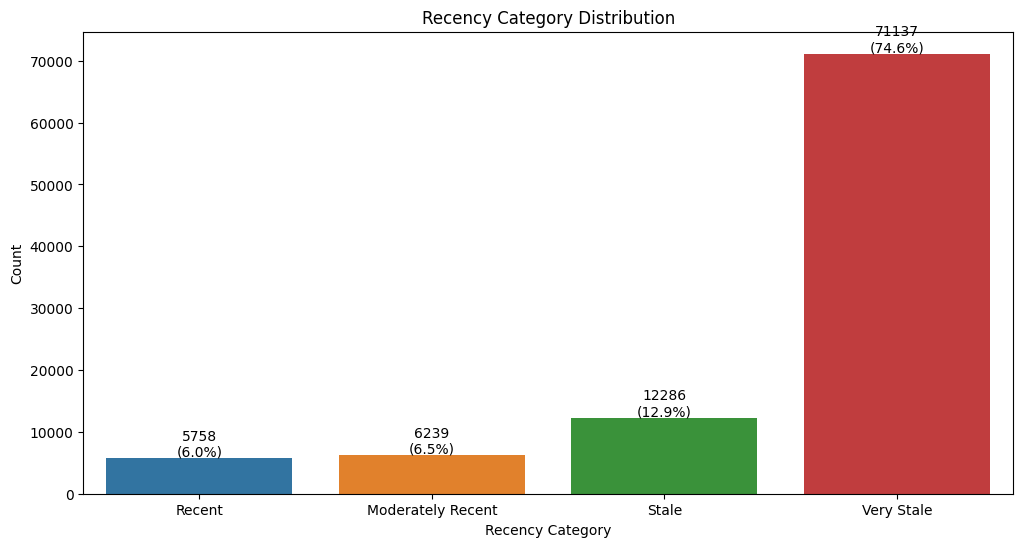

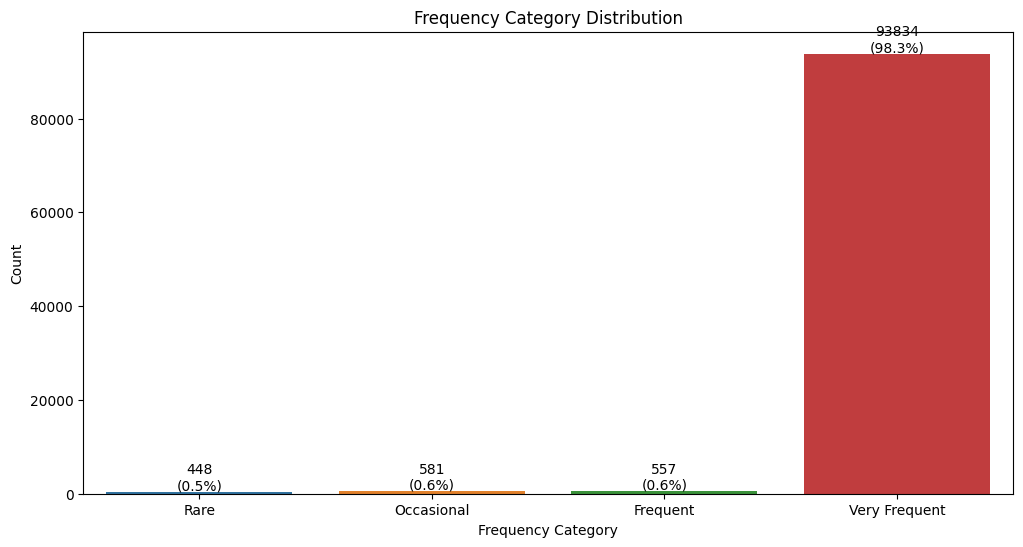

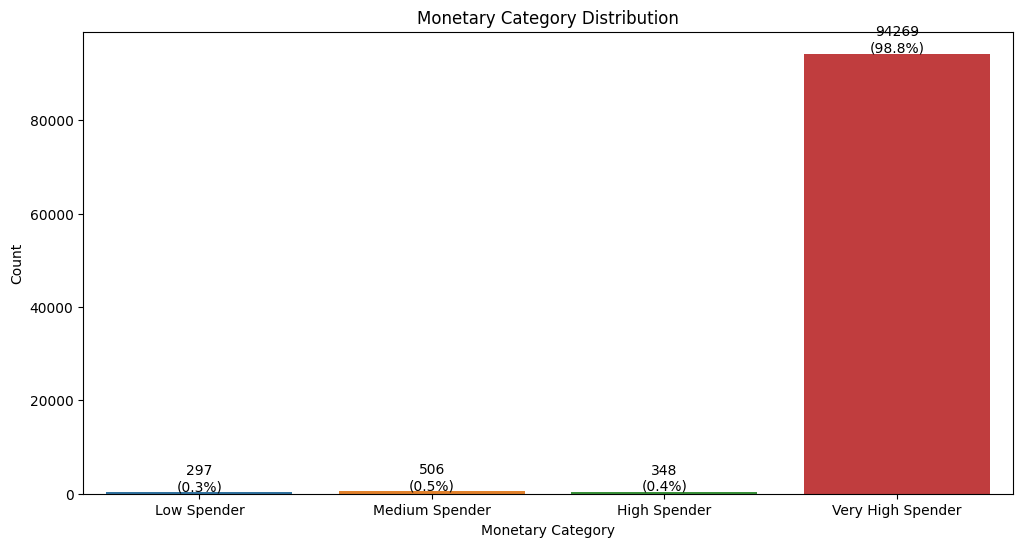

In [108]:
plot_rfm_analysis(rfm_table)

> #### Most customers fall into the RFM categories of Very Stale, Very Frequent, and Very High Spender.

- The fact that many customers fall into the "Very Stale" category suggests that while these customers may have been highly active in the past, they haven’t returned to the platform recently. This could indicate the need for re-engagement strategies, such as targeted email campaigns, special offers, or personalized recommendations to bring them back.


- Despite being stale in terms of recent purchases, these customers have made frequent purchases in the past. In RFM, "Very Frequent" customers are those who have a high frequency score, meaning they are repeat buyers. This indicates that although they are currently inactive, these customers were loyal and consistent buyers in the past. Retargeting these customers could yield strong results because they have demonstrated their willingness to engage repeatedly with the platform.


- These customers have spent a significant amount of money on the platform. A "Very High Spender" classification in RFM means that these customers have contributed a large share of revenue in the past. These high-spending customers are valuable to the business. Although they haven’t made a purchase recently, their past spending habits make them an attractive segment to target